# **Logistic Regression with Iris Dataset**

This project utilizes the [Iris Dataset](https://www.kaggle.com/datasets/uciml/iris), which is publicly available and licensed under **CC0: Public Domain**, making it free to use for analysis and experimentation.

The dataset consists of 150 samples from three iris species (*Iris-setosa*, *Iris-versicolor*, *Iris-virginica*), with the following features:
- **Sepal length (cm)**
- **Sepal width (cm)**
- **Petal length (cm)**
- **Petal width (cm)**

In this notebook, logistic regression is applied to classify the iris species based on selected features, and the decision boundaries are visualized for better interpretability.

### Data Preprocessing and Encoding

After loading the dataset, we perform a check to determine if there is any need to process the columns further. This includes checking for missing values and ensuring data types are appropriate.

The dependent variable, **`Species`**, is of the `object` type. To prepare it for modeling, we apply encoding to the **`Species`** column using the `LabelEncoder` from the `sklearn.preprocessing` module.

In [2]:
import pandas as pd

df = pd.read_csv("Iris.csv")

print(df.columns)
print(df.isnull().sum())
print(df.dtypes)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Species'] = label_encoder.fit_transform(df['Species'])


Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64
Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


### Correlation Heatmap

To analyze the correlation between the columns, we create a heatmap. This visual representation allows us to observe the relationships and strength of associations between variables. The heatmap is generated using the `seaborn` library with annotations and a `coolwarm` color map for better readability.

<Axes: >

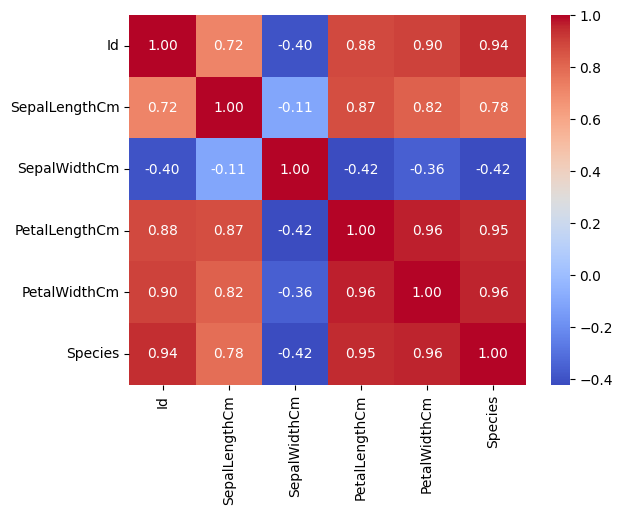

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')

Visualization with Logistic Regression
For logistic regression, two independent variables were selected: PetalWidthCm and SepalLengthCm. While PetalWidthCm and PetalLengthCm exhibit high correlation, SepalLengthCm was chosen as a better alternative to minimize redundancy.

The dataset was divided into training and testing sets to train the model and evaluate its accuracy. To ensure a clear and precise visualization, a mesh grid was generated over the feature space using numpy with 0.1 intervals. The decision boundaries predicted by the logistic regression model are visualized using the Z variable, representing the model's decision regions.

The plot includes:

A contour plot illustrating the decision boundaries.
Training data points, displayed as circles (o).
Test data points, displayed as crosses (x).
Axis titles for PetalWidthCm and SepalLengthCm are added to enhance interpretability, facilitating an understanding of the model's performance and decision-making process.

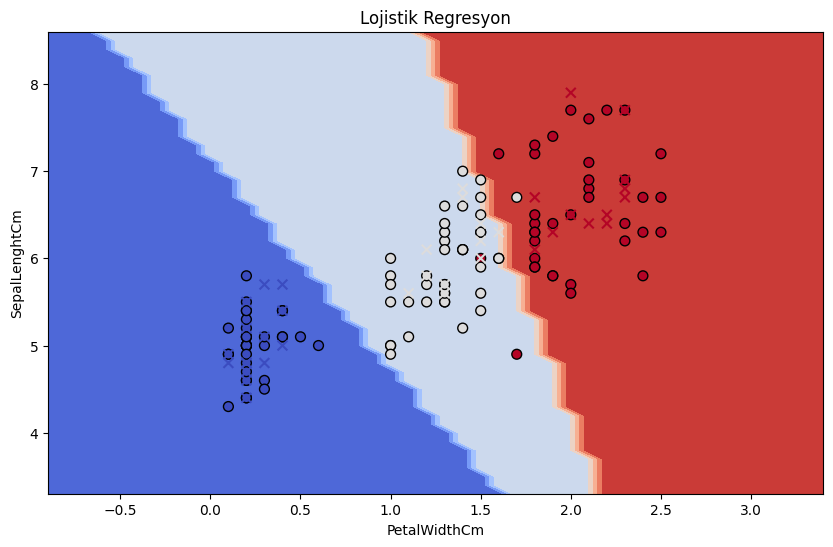

In [4]:
X = df[['PetalWidthCm','SepalLengthCm']].values
y = df['Species'].values

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

x_min, x_max = X_train[:,0].min() -1, X_train[:,0].max() +1
y_min, y_max = X_train[:,1].min() -1, X_train[:,1].max() +1

xx,yy = np.meshgrid(np.arange(x_min,x_max,0.1),np.arange(y_min,y_max,0.1))

grid_points = np.c_[xx.ravel(), yy.ravel()]  
Z = model.predict(grid_points)  
Z = Z.reshape(xx.shape)  

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap="coolwarm")  
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors="k", marker="o", cmap="coolwarm", s=50)
plt.scatter(X_test[:,0],X_test[:,1],c=y_test,marker='x',cmap="coolwarm",s=50)
plt.title("Lojistik Regresyon")
plt.xlabel("PetalWidthCm")
plt.ylabel("SepalLenghtCm")
plt.show()